### Investigación de películas de Netflix

Como prueba, nos han proporcionado la siguiente información. Para los años de 2011 a 2020, las duraciones promedio de las películas son 103, 101, 99, 100, 100, 95, 95, 96, 93 y 90, respectivamente.

In [2]:
# Vamos a crear la lista Años y duracion respectivamente
anhos = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
duraciones = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Crear un diccionario con las 2 listas
movie_dict = {'anhos' : anhos, 'duraciones' : duraciones}

# Print the dictionary
movie_dict

{'anhos': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'duraciones': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

### 2. Crear un DataFrame a partir de un diccionario
Para convertir nuestro diccionario movie_dict en un DataFrame de pandas, primero necesitaremos importar la biblioteca con su alias habitual. También querremos inspeccionar nuestro DataFrame para asegurarnos de que se haya creado correctamente. Realicemos estos pasos ahora.

In [3]:
# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
duraciones_df = pd.DataFrame(movie_dict)

# Print the DataFrame
duraciones_df

,anhos,duraciones
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


### 3. Una inspección visual de nuestros datos
Muy bien, ahora tenemos un DataFrame de pandas, la forma más común de trabajar con datos tabulares en Python.
Ahora a partir del DataFrame es un buen momento para comenzar a visualizar de los datos a traves de graficos.

Dado que los datos son continuos, un gráfico de líneas sería una buena opción.

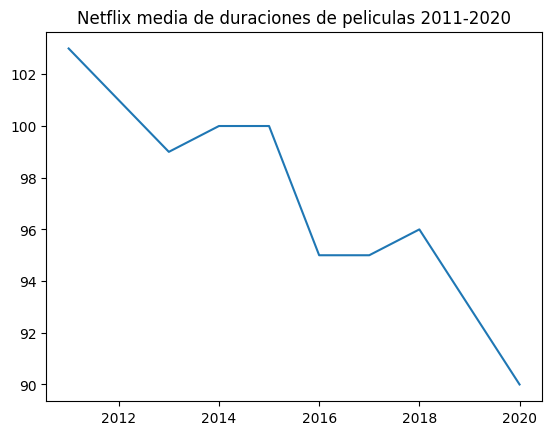

In [4]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(duraciones_df['anhos'], duraciones_df['duraciones'])

# Create a title
plt.title('Netflix media de duraciones de peliculas 2011-2020')

# Show the plot
plt.show()

### 4. Cargar el resto de datos desde un CSV
Bueno, ¡parece que hay algo en la idea de que la duración de las películas ha disminuido en los últimos diez años! Pero equipados solo con las agregaciones de nuestros amigos, estamos limitados en las exploraciones adicionales que podemos realizar. Hay algunas preguntas sobre esta tendencia que actualmente no podemos responder, que incluyen:

¿Cómo se ve esta tendencia durante un período de tiempo más largo?

¿Es esto explicable por algo como el género de entretenimiento?

In [7]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv('datasets/netflix_data.csv')

# Print the first five rows of the DataFrame
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


### 5. ¡Filtrado de películas!
Afortunadamente, un DataFrame nos permite filtrar datos rápidamente y podemos seleccionar filas donde el tipo es Película. Mientras estamos en eso, no necesitamos información de todas las columnas, así que vamos a crear un nuevo DataFrame netflix_movies que contenga solo título, país, género, lanzamiento_año y duración.

In [8]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[['title', 'country',
                                                    'genre', 'release_year', 'duration']]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


### 6. Crear un diagrama de dispersión
Un diagrama de líneas ya no es una buena opción para nuestros datos, así que intentemos con un diagrama de dispersión.

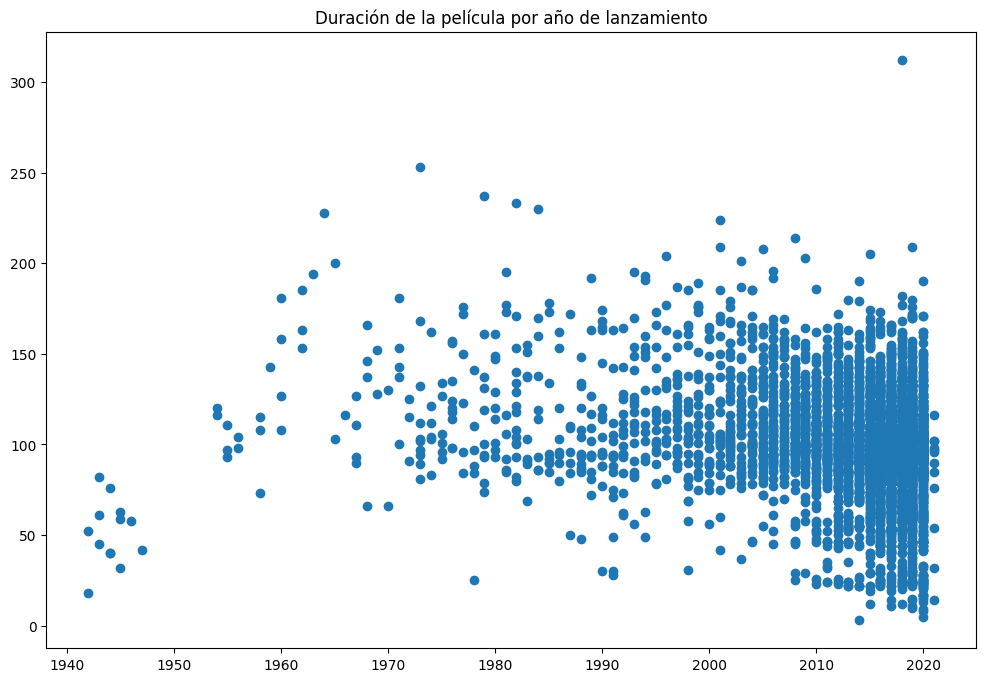

In [10]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'])

# Create a title
plt.title('Duración de la película por año de lanzamiento')

# Show the plot
plt.show()

### 7. Profundizando más
Tras una inspección más detallada, algo más está sucediendo. ¡Algunas de estas películas duran menos de una hora! Filtremos nuestro DataFrame para películas con una duración inferior a 60 minutos y veamos los géneros. Esto podría darnos una idea de lo que está arrastrando hacia abajo el promedio.

In [11]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60]

# Print the first 20 rows of short_movies
short_movies.head(20)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


### 8. Marcaje de largometrajes
Podríamos eliminar estas filas de nuestro DataFrame y trazar los valores nuevamente. Pero otra forma interesante de explorar el efecto de estos géneros en nuestros datos sería graficarlos, pero marcándolos con un color diferente.

In [12]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for movie, row in netflix_movies_col_subset.iterrows() :
    if row["genre"] == "Children" :
        colors.append('red')
    elif row["genre"] == "Documentaries" :
        colors.append('blue')
    elif row["genre"] == "Stand-Up" :
        colors.append('green')
    else:
        colors.append('black')
        
# Inspect the first 10 values in your list        
colors[:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'blue']

### 9. Trazado con color
Ahora tenemos una lista de colores que podemos pasar a nuestro diagrama de dispersión, lo que debería permitirnos inspeccionar visualmente si estos géneros pueden ser responsables de la disminución en la duración promedio de las películas.

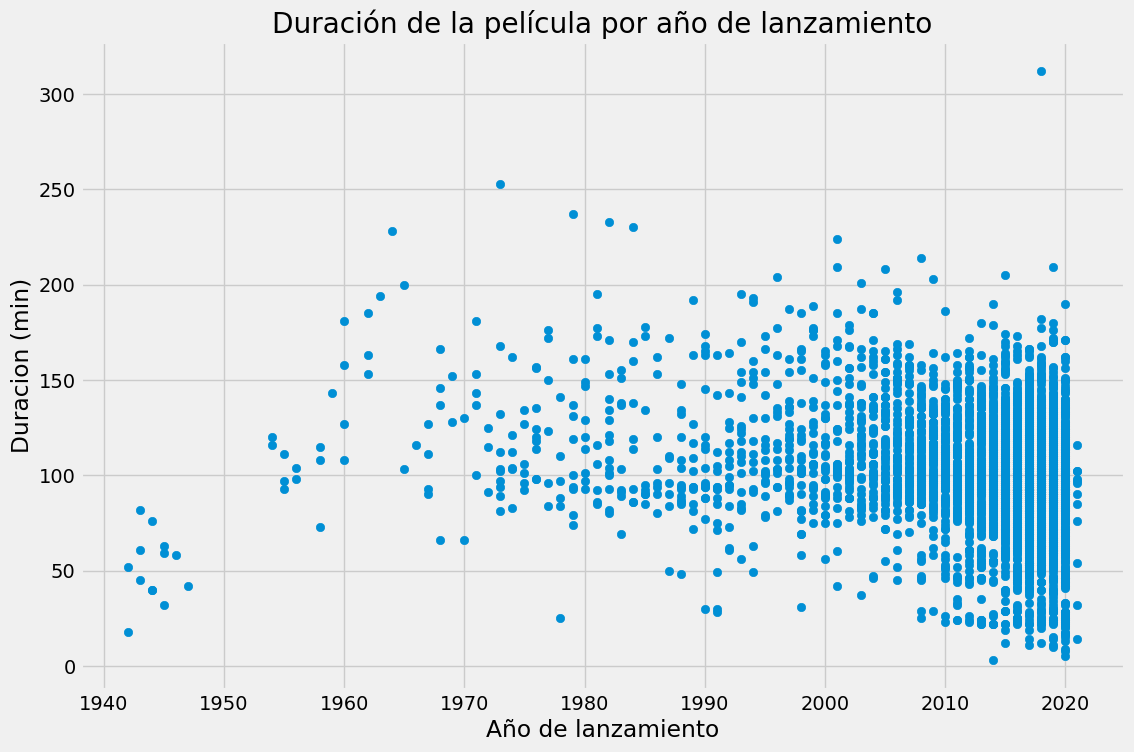

In [15]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'])

# Create a title and axis labels
plt.title('Duración de la película por año de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Duracion (min)')

# Show the plot
plt.show()

### 10. Conclusion
Bueno, como sospechábamos, los géneros atípicos, como las películas para niños y los documentales, se agrupan alrededor de la mitad inferior de la trama. Pero no podemos saberlo con certeza hasta que realicemos análisis adicionales.